We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.

The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000. See the article (P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". (Machine Learning Vol 6 No.2 March 91)) for more details.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm  # SVM 
import matplotlib.pyplot as plt
# as the data is random we don't need a train_test_split

In [2]:
def getAccuracy(testSet , predictions):
    correct = 0
    testSet_len = len(testSet)
    for i in range(testSet_len):
        if testSet[i] == predictions[i]:
            correct += 1
    return (correct/testSet_len)*100

### Load Data

In [3]:
lData = pd.read_csv('C://Users/syeda/Downloads/letterdata.csv')

In [4]:
lData.head() # each letter is identified by a numeric attribute

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [5]:
lData.shape

(20000, 17)

In [6]:
lData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### Split Data

In [7]:
X = np.array(lData)[:,1:]

In [8]:
y = np.array(lData)[:,0]

In [9]:
X_train = X[:16000,:]
X_test = X[16001:,:]
y_train = y[:16000]
y_test = y[16001:]

### Build Model

In [10]:
clf = svm.SVC(gamma=0.025 ,C=3)

- `gamma` is a measure of influence of a data point. It is inverse of distance of influence. 
- C is penalty of wrong classifications.

In [11]:
clf.fit(X_train,y_train)

SVC(C=3, gamma=0.025)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
getAccuracy(y_test,y_pred) # custom defined method

97.44936234058514

In [14]:
from sklearn import metrics

In [15]:
metrics.accuracy_score(y_test,y_pred)

0.9744936234058514

In [16]:
import string
lab = list(string.ascii_uppercase) # we will get A to Z labels
pred_labels = ['Pr '+i for i in lab] 

In [17]:
import seaborn as sns

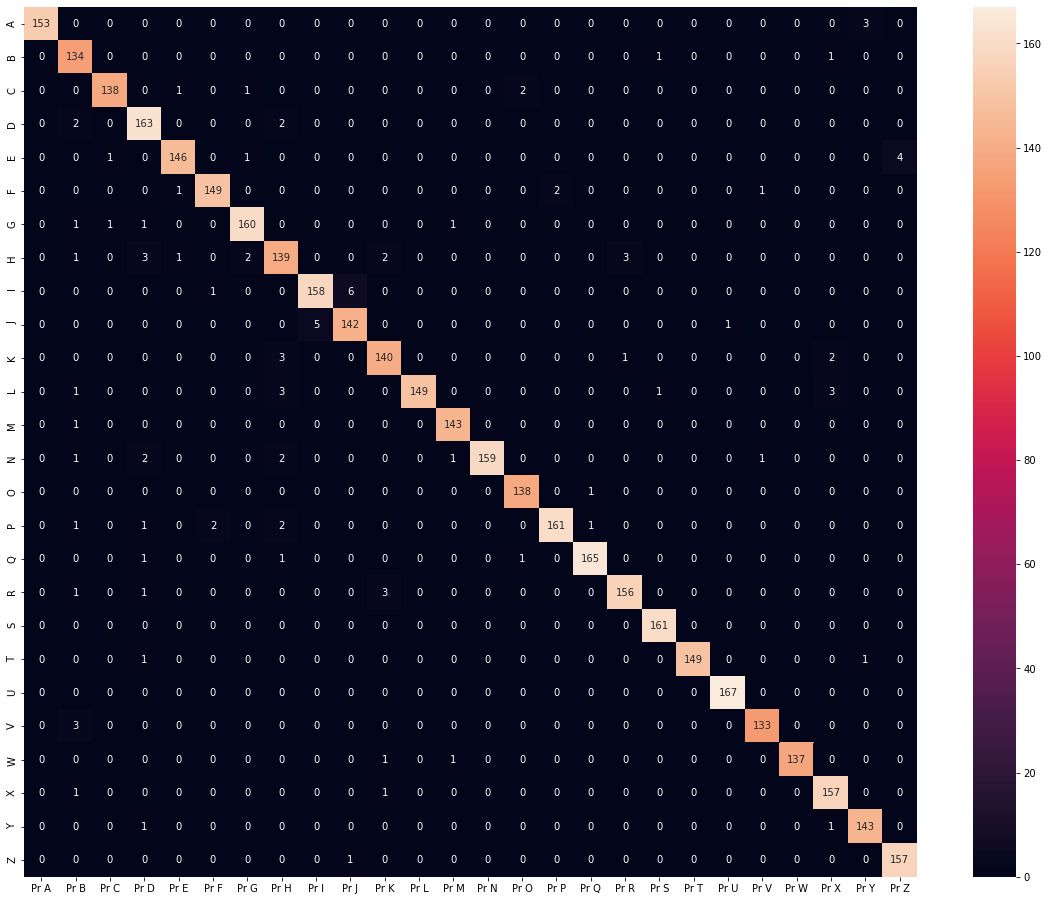

In [18]:
cm = metrics.confusion_matrix(y_test,y_pred,labels= lab)
df_cm = pd.DataFrame(cm, index=[i for i in lab], columns=[i for i in pred_labels])
plt.figure(figsize=(20,16))
sns.heatmap(df_cm,annot=True,fmt='g')
plt.show()